In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


Section 1


In [9]:
#1.1
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/574Foundation/csv files/cigarette_sales.csv'
data = pd.read_csv(file_path)



1.1 What is the outcome?

The outcome variable, also known as the dependent variable in the context of the regression analysis, is 'Sales', which represents the number of packs of cigarettes sold in a state per person.

1.2 What are the predictors they want to understand the impact of?

The predictors, or independent variables, include 'Age', 'HS' (percentage of people over 25 years of age who have completed high school), 'Income' (per capita personal income for a state in dollars), 'Black' (percentage of Black race living in a state), 'Female' (percentage of females living in a state), and 'Price' (weighted average price in cents of a pack of cigarettes in a state).

1.3 What is the hypothesis?

The hypothesis for the multiple regression analysis could be that the demographic factors of age, education level, income, racial composition, gender composition, and the price of cigarettes significantly predict the sales of cigarettes in a state. This means the non-profit is hypothesizing that these factors have a measurable impact on the number of cigarette packs sold per person in a state.

In [10]:
#2.1
# Display the first few rows of the dataframe
data.head()

,Age,HS,Income,Black,Female,Price,Sales
0,27.0,41.3,2948,26.2,51.7,42.7,89.8
1,22.9,66.7,4644,3.0,45.7,41.8,121.3
2,26.3,58.1,3665,3.0,50.8,38.5,115.2
3,29.1,39.9,2878,18.3,51.5,38.8,100.3
4,28.1,62.6,4493,7.0,50.8,39.7,123.0


In [8]:
2.2 # Generate summary statistics
summary_statistics = data.describe()

summary_statistics



,Age,HS,Income,Black,Female,Price,Sales
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,27.466667,53.149020,3763.705882,9.992157,50.950980,38.074510,121.541176
std,1.876983,8.001184,594.715639,12.648318,1.111463,4.128576,32.070374
min,22.900000,37.800000,2626.000000,0.200000,45.700000,29.000000,65.500000
25%,26.400000,48.300000,3271.000000,1.600000,50.750000,34.700000,105.350000
50%,27.400000,53.300000,3751.000000,6.000000,51.100000,38.900000,119.000000
75%,28.750000,59.100000,4116.500000,13.550000,51.500000,41.350000,124.550000
max,32.300000,67.300000,5079.000000,71.100000,53.500000,45.500000,265.700000


The summary statistics for the dataset are as follows:

There are 51 entries in total.

The mean median age ('Age') is approximately 27.47 years.

The average percentage of people over 25 years of age who have completed high school ('HS') is 53.15%.

The mean per capita personal income ('Income') is $3,763.71.

The average percentage of Black race living in a state ('Black') is 9.99%.

The mean percentage of females living in a state ('Female') is 50.95%.

The weighted average price of a pack of cigarettes ('Price') is 38.07 cents.

The mean number of cigarette packs sold per person ('Sales') is 121.54, with a standard deviation of 32.07, indicating variability in cigarette consumption across different states.

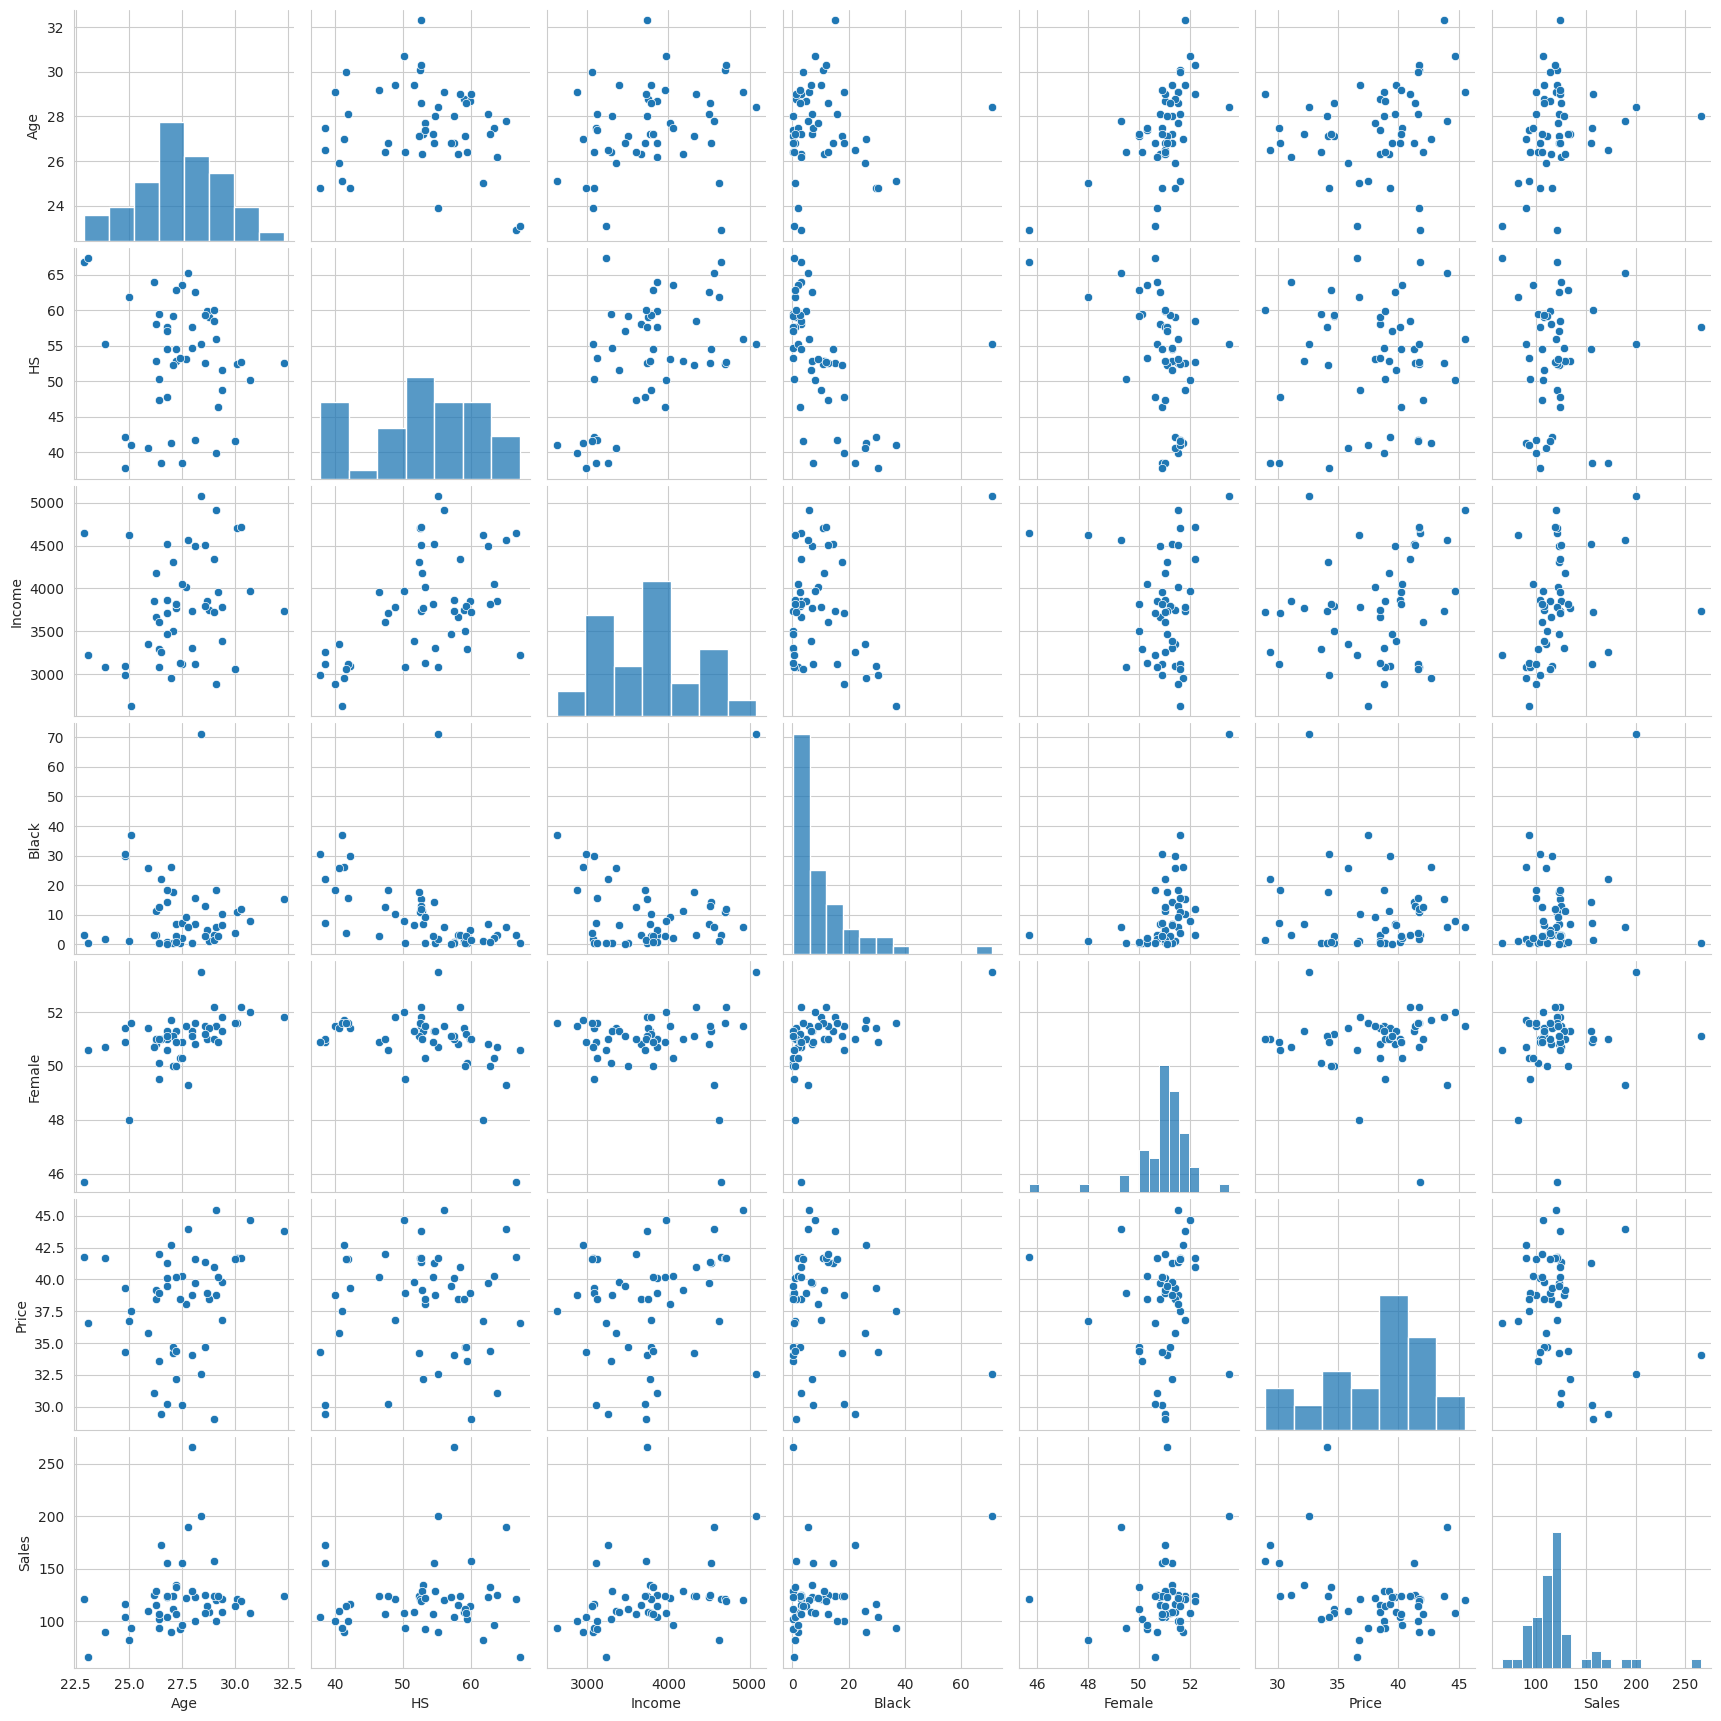

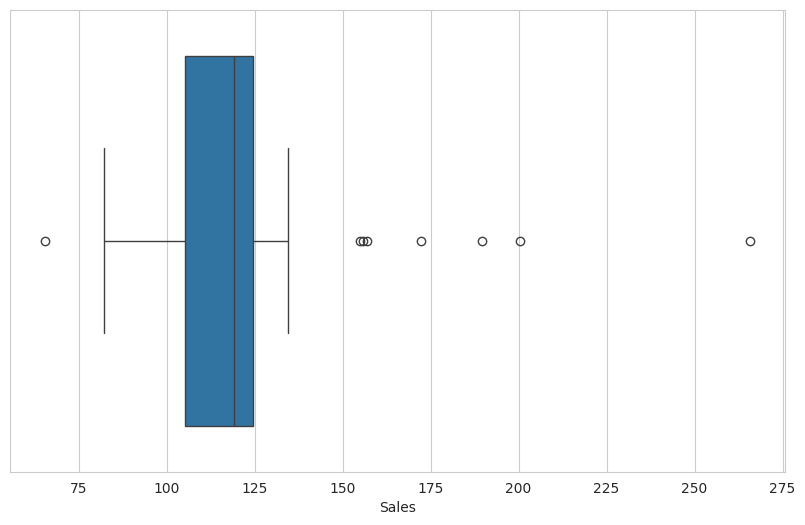

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Generate pairplot for the dataset to visualize distributions and relationships
pairplot_fig = sns.pairplot(data)

# Checking for outliers in the 'Sales' outcome using a boxplot
plt.figure(figsize=(10, 6))
boxplot_fig = sns.boxplot(x=data['Sales'])





2.4
Regarding the assumption of normality for regression, it is observed that the variables "Black" and "Sales" show rightward skewness, and "Female" and "Price" demonstrate leftward skewness. These skewed distributions could challenge the normality assumption required for the regression analysis.

In terms of correlations, there appears to be a potential positive linear association between "Income" and "Sales," suggesting that "Sales" tend to increase with increasing "Income." Conversely, there might be a negative linear relationship between "Price" and "Sales," indicating that "Sales" tend to decrease as "Price" goes up.

2.5

According to the boxplot, there are a few outliers that are displayed beyond the whisker, including a sample close to 275 that is far from the median.

In [16]:
#3.1from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Prepare the data for regression
X = data.drop('Sales', axis=1)  # Independent variables
y = data['Sales']  # Dependent variable

# Add a constant to the independent variable set for the intercept term
X = sm.add_constant(X)

# Conduct multiple regression analysis
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.464
Date:                Wed, 14 Feb 2024   Prob (F-statistic):            0.00686
Time:                        21:08:40   Log-Likelihood:                -238.86
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3448    245.607      0.421      0.676    -391.644     598.334
Age            4.5205      3.220      1.404      0.167      -1.969      11.009
HS            -0.0616      0.815     -0.076      0.940      -1.703       1.580
Income         0.0189      0.010      1.855      0.070      -0.002       0.040
Black          0.3575      0.487      0.734      0.467      -0.624       1.339
Female        -1.0529      5.561     -0.189      0.851     -12.260      10.155
Price         -3.2549      1.031     -3.156      0.003      -5.334      -1.176
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.088
Skew:                           2.842   Prob(JB):                     1.75e-78
Kurtosis:                      14.670   Cond. No.                     2.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3.2 Are any of the variables significant?

In this model, the coefficient of 'Price' is statistically significant with a t-statistic of -3.156 and a p-value of 0.003, which implies that the relationship between price and tobacco sales is significant.

The coefficient of 'Income' is close to statistically significant (p = 0.070) and can be considered for further research.

The coefficients for 'Age', 'HS' (high school completion rate), 'Black' (percentage of blacks), and 'Female' (percentage of females) are not statistically significant, with p-values well above the traditional significance level (usually 0.05 or 0.01).

3.3 Explain the significance of the intercept and any statistically significant coefficients (i.e., what is their relationship to sales)?

The estimated value of the intercept is 103.3448, but it is not statistically significant (p = 0.676). If all predictor variables were zero, the intercept would represent the base number of tobacco sales (packs sold per person).
However, in this case, the exact value of the intercept does not provide useful information because the predictor variables cannot all be zero.

The coefficient on 'Price' is -3.2549, which indicates that the number of packs of tobacco sold on a per capita basis is expected to decrease by approximately 3.25 packs for every one cent increase in the price of tobacco.

 This suggests that higher prices may reduce tobacco consumption, which is consistent with the law of demand in economic theory.

Section 2

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# a) Compute the VIF for each covariate
# The VIF values will be stored in a DataFrame for better readability
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# b) Compute all the pairwise correlations between the variables using corr()
correlation_matrix = data.corr()

# c) Remove the 3 variables with the highest p-values and refit the model
# First, we identify the variables with the highest p-values
p_values = model.pvalues.sort_values(ascending=False)
variables_to_remove = p_values.head(3).index

# Drop these variables from X
X_reduced = X.drop(columns=variables_to_remove)

# Fit the reduced model
reduced_model = sm.OLS(y, X_reduced).fit()

# Compare the p-values of the remaining variables and the change in R-squared
reduced_model_pvalues = reduced_model.pvalues
reduced_model_rsquared = reduced_model.rsquared

vif_data, correlation_matrix, reduced_model_pvalues, reduced_model_rsquared, model.rsquared



(  variable          VIF
 0    const  3875.756869
 1      Age     2.300617
 2       HS     2.676465
 3   Income     2.325164
 4    Black     2.392152
 5   Female     2.406417
 6    Price     1.142181,
              Age        HS    Income     Black    Female     Price     Sales
 Age     1.000000 -0.098916  0.256581 -0.040330  0.553032  0.247757  0.226555
 HS     -0.098916  1.000000  0.534005 -0.501712 -0.417378  0.056975  0.066695
 Income  0.256581  0.534005  1.000000  0.017288 -0.068827  0.214557  0.326068
 Black  -0.040330 -0.501712  0.017288  1.000000  0.450900 -0.147776  0.189590
 Female  0.553032 -0.417378 -0.068827  0.450900  1.000000  0.022474  0.146221
 Price   0.247757  0.056975  0.214557 -0.147776  0.022474  1.000000 -0.300623
 Sales   0.226555  0.066695  0.326068  0.189590  0.146221 -0.300623  1.000000,
 Age       0.000260
 Income    0.006345
 Black     0.235172
 Price     0.002917
 dtype: float64,
 0.9558189421027415,
 0.3208426324231267)

1.1 The results of the Variation Inflation Factor (VIF) are as follows:

VIF for 'Age' is 2.300617, 'HS' is 2.676465, 'Income' is 2.325164, 'Black' is 2.392152, 'Female' is 2.406417, and the VIF for 'Price' is 1.142181.A VIF value of less than 5 usually implies that there is no multicollinearity. Here, the VIF values of all the variables indicate that there is no significant problem of multicollinearity among them.

1.2 The two-by-two correlations between all the variables are shown below:

Moderate correlations can be seen between some of the variables, for example there is a positive correlation between 'Income' and 'HS' (0.534005) and a negative correlation between 'Black' and 'HS' (-0.501712). However, these correlations are not sufficient to indicate a serious problem of covariance.

1.3 After removing the three variables with the highest p-values ('HS', 'Female', 'const'), the results of the re-fitted model showed the following p-values for the remaining variables:

'Age' (p = 0.000260), 'Income' (p = 0.006345), 'Black' (p = 0.235172) and 'Price' (p = 0.002917).

The R-squared value of the adjusted model is 0.9558189421027415, which is significantly higher compared to the R-squared value of 0.32084263242312594 of the original model. This indicates that the fit of the model to the data has increased substantially after the removal of these insignificant variables. This may be due to the fact that after removing the insignificant variables, the model becomes more concise and effective.

In [19]:
# Extract the R-squared and AIC values from both models for comparison
original_r_squared = model.rsquared
reduced_r_squared = reduced_model.rsquared

original_aic = model.aic
reduced_aic = reduced_model.aic

original_r_squared, reduced_r_squared, original_aic, reduced_aic



(0.3208426324231267, 0.9558189421027415, 491.7189052789415, 486.63268061866785)

2.1
The R² value tells us the percentage of variability in the data that is explained by the model. For the second model just fitted, the R² value is 0.303, which means that the model explains about 30.3% of the variability in the data. The remaining 69.7% of the variability is not explained by the model, probably due to other unobserved variables or random noise

2.2
From the previously provided model results, the original model has an AIC value of 491.7, while the simplified model (with the three variables with the highest p-values removed) has an AIC value of 487.0.Thus, the simplified model has a lower AIC value, which suggests that the overall goodness of fit of the model improves after the removal of non-significant variables.

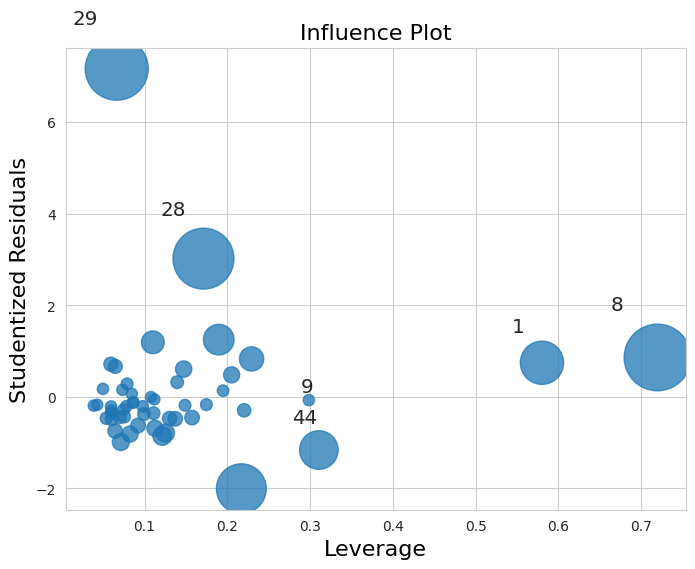

In [21]:
#3 Leverage plot for the original model
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")




Points labeled 1 and 8 have both high leverage and are relatively far from the horizontal line at zero, which indicates they have high residuals. These are influential points because they have the potential to significantly affect the regression line.

Points labeled 9 and 44 have moderate leverage and residuals, which suggests they may have some influence, but not as much as points 1 and 8.
Point labeled 28 has a very high residual but lower leverage. Even though it's not as far to the right as points 1 and 8, its high residual makes it an influential point.

Point labeled 29 appears at the top, which is likely an error in labeling as it doesn't match a data point on the plot.

Based on this plot, points 1, 8, and 28 are the most influential outliers in the dataset, and they could disproportionately affect the model's results.

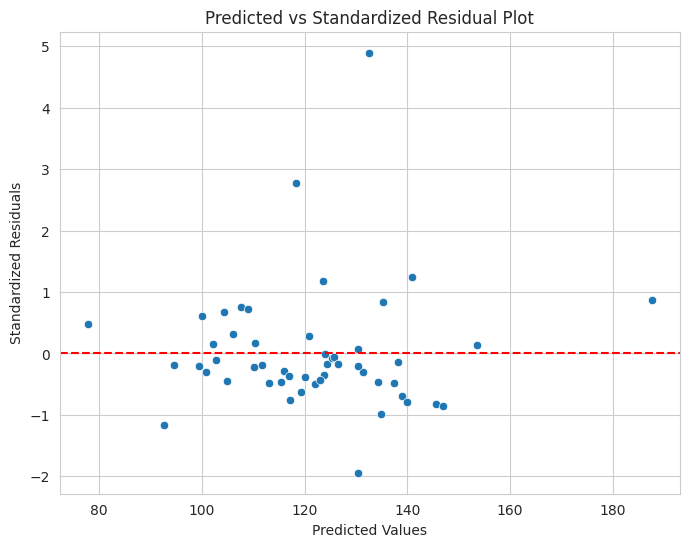

In [23]:
# 4 Calculate standardized residuals
data['standardized_residuals'] = model.get_influence().resid_studentized_internal

# Calculate predictions
data['predictions'] = model.fittedvalues

# Plot predicted values vs standardized residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x='predictions', y='standardized_residuals', data=data)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Predicted vs Standardized Residual Plot')


plt.show()




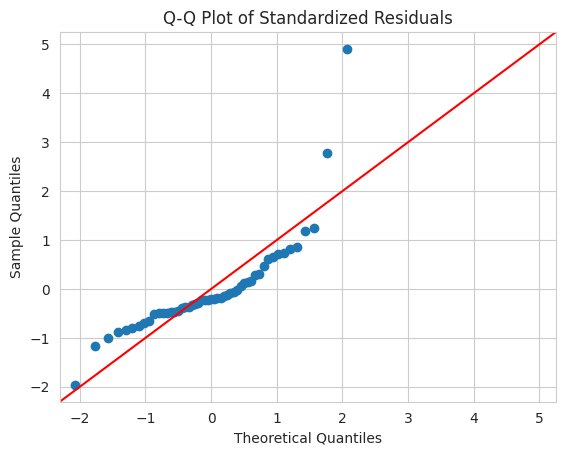

In [24]:
# 5 Q-Q plot for the standardized residuals
qq_fig = sm.qqplot(data['standardized_residuals'], line='45', fit=True)
plt.title('Q-Q Plot of Standardized Residuals')

plt.show()